

---



---


# KNN - Iris Dataset

Este notebook mostra o uso do algoritmo [KNeighborsClassifier - KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier): algoritmo do k-vizinhos mais próximos disponível na biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) para realizar a classificação do conjunto de dados **Iris** ([Iris Dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets)).


---

---

##Iris Dataset

O conjunto de dados Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher com o objetivo de quantificar a variação morfológica das flores da íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante para distinguir as espécies umas das outras.

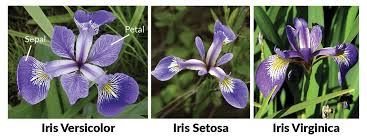

- Número de classes: 3 (setosa, virginica e versicolor)
- Amostras por classe: 50
- Total de amostras: 150
- Número de atributos (dimensionalidade): 4 (comprimento das sépalas, largura das sépalas, comprimento das sépalas e largura das pétalas)



---



---



## Importa módulo com funções para medir o desempenho do classificador

In [21]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

### Importação dos dados - Iris dataset

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
class_names = iris.target_names
X = iris.data
y = iris.target
print(type(X))
print(X.shape)
print(X)
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

## Redução de dimensionalidade usando PCA (*Principal Component Analysis*)

Para melhor entendimento e compreensão da estrutura dos dados aplicamos o algoritmo de redução de dimensionalidade [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) para visualizarmos os dados em 3 dimensões.

Essa técnica de análise dos componentes principais é comumente usada para
compressão, visualização e classificação de dados. A ideia central é reduzir a dimensionalidade de um conjunto de dados com o mínimo de perda de informação.

As componentes principais em geral são extraídas via matriz de covariância, as quais são influenciadas pelas variáveis de maior variância.

Baseado em:
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
-https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

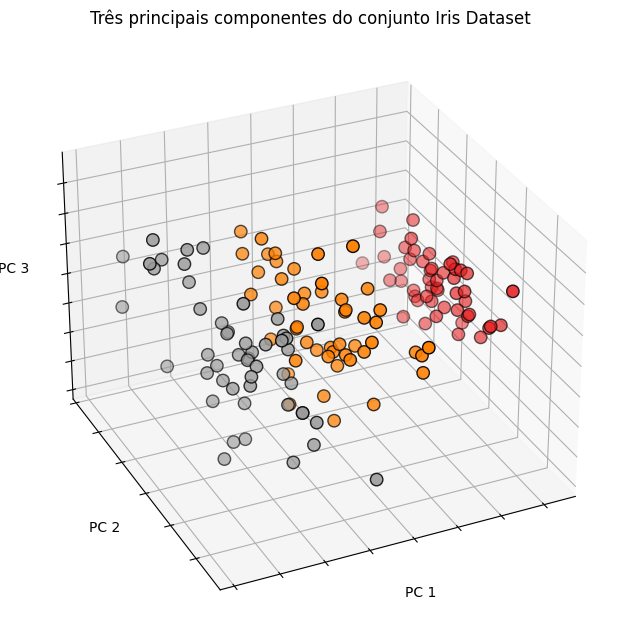

In [30]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig, elev=-150, azim=115)
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=115)
ax.set_position([0, 0, 0.95, 1])
X_reduced = PCA(n_components=3).fit_transform(iris.data) # aplicação da PCA
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=80)
ax.set_title("Três principais componentes do conjunto Iris Dataset")
ax.set_xlabel("PC 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("PC 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("PC 3")
ax.zaxis.set_ticklabels([])
plt.show()

### Separa em dois conjuntos de dados (treinamento e teste)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Aplicação do KNN

Taxa de acerto =  94.74 %

Matriz de confusão:



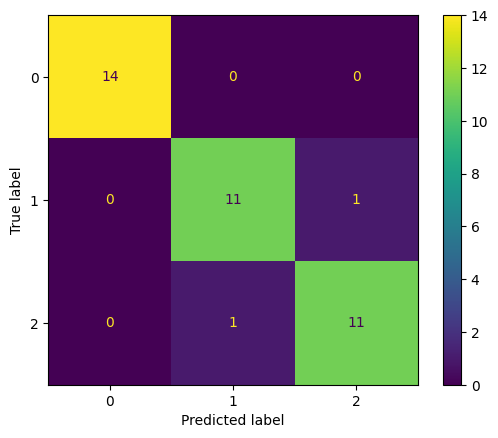

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)
acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)
print('Taxa de acerto = ',round(acertos_knn*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
cm_knn = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
#print(cm_knn.confusion_matrix)
plt.show()